# Problem Statement

The objective of this article is to predict flight prices given the various parameters.

Airline companies use complex algorithms to calculate flight prices given various 
conditions present at that particular time. These methods take financial, marketing, 
and various social factors into account to predict flight prices.

Nowadays, the number of people using flights has increased significantly.
It is difficult for airlines to maintain prices since prices change dynamically
due to different conditions. That’s why we will try to use
machine learning to solve this problem.
This can help airlines by predicting what prices they can maintain. 
It can also help customers to predict future flight prices and plan their journey accordingly.

Description:
    Airline: Name of the airline used for traveling

Date_of_Journey: Date at which a person traveled

Source: Starting location of flight

Destination: Ending location of flight

Route: This contains information on starting and ending location of the journey in the standard format used by airlines.
 
 Dep_Time: Departure time of flight from starting location

Arrival_Time: Arrival time of flight at destination

Duration: Duration of flight in hours/minutes

Total_Stops: Number of total stops flight took before landing at the destination.

Additional_Info: Shown any additional information about a flight
    
Price: Price of the flight

# Importing all required libraries

In [1]:

import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)

# Uploading the Data

In [2]:
data=pd.read_excel(r'Data_Train.xlsx',header=0)
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
print(data.dtypes)
print(data.shape)

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object
(10683, 11)


In [4]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
for value in ['Route','Total_Stops',]:
    data[value].fillna(data[value].mode()[0],inplace=True)

In [6]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10683 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10683 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
#Lets do the EDA part

In [9]:
#Replacing date of journey seperately eith columns as journey_day and journey month
data['journey_day']=pd.to_datetime(data.Date_of_Journey,format = '%d/%m/%Y').dt.day
data['journey_month']=pd.to_datetime(data.Date_of_Journey,format = '%d/%m/%Y').dt.month

In [10]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [11]:
#also create dep_hour and dep_min from dep_time

In [12]:
data['Dep_hour']=pd.to_datetime(data.Dep_Time).dt.hour
data['Dep_minute']=pd.to_datetime(data.Dep_Time).dt.minute

In [13]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_hour,Dep_minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [14]:
#as we have already created extra  variables for Date_of_Journey and Dep_time so
#lets try dropping these 2 variables

data.drop(columns=['Date_of_Journey','Dep_Time'],inplace=True)

In [15]:
data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_hour,Dep_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [16]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
data["Arrival_hour"] = pd.to_datetime(data.Arrival_Time).dt.hour

# Extracting Minutes
data["Arrival_min"] = pd.to_datetime(data.Arrival_Time).dt.minute



In [17]:
data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [18]:
# Now we can drop Arrival_Time as it is of no use
data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [19]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [20]:
#lets convert duration column  into list
duration = list(data.Duration)
len(duration)

10683

In [21]:
for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

In [22]:
#create a seperate list for dur_hours and dur_min
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split()[0][:-1]))#to extract hours 
    duration_mins.append(int(duration[i].split()[1][:-1]))#to extract only  minutes from duration

In [23]:
#now we can create columns using above list

data['Duration_hours'] = duration_hours
data['Duration_mins'] = duration_mins

In [24]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [25]:
data.drop(["Duration"], axis = 1, inplace = True)

In [26]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [27]:
# As we have source and destination variables there is noo need of route it is 
#directly understood and ther is no need of add_info so we will drop route,add_info variable
data.drop(["Route","Additional_Info"], axis = 1, inplace = True)

In [28]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [29]:
# total records for airlines
data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<AxesSubplot:>

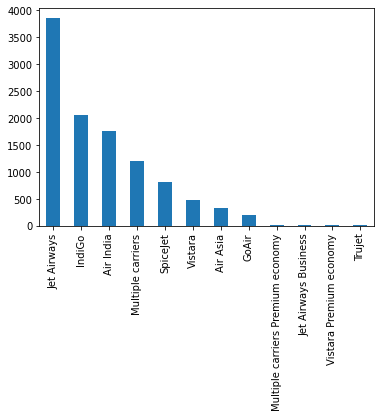

In [30]:
data['Airline'].value_counts().plot(kind='bar')

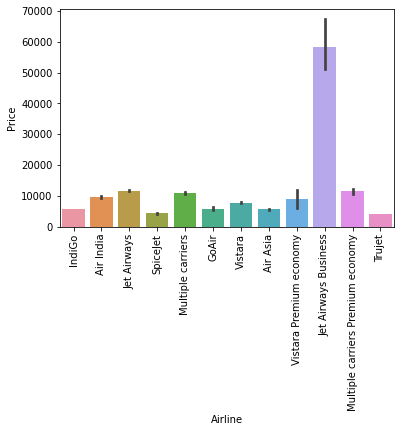

In [31]:
sns.barplot(x=data['Airline'],y=data['Price'])
plt.xticks(rotation="vertical")
plt.show()

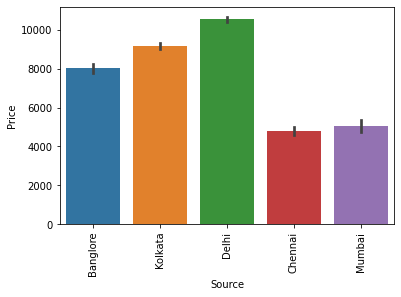

In [32]:
sns.barplot(x=data['Source'],y=data['Price'])
plt.xticks(rotation="vertical")
plt.show()

In [33]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [34]:
#As we have cleaned most of the data, we can see that there are still
#some variables which are categorical,so lets convert them into numerical
data.dtypes

Airline           object
Source            object
Destination       object
Total_Stops       object
Price              int64
journey_day        int64
journey_month      int64
Dep_hour           int64
Dep_minute         int64
Arrival_hour       int64
Arrival_min        int64
Duration_hours     int64
Duration_mins      int64
dtype: object

In [35]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price',
       'journey_day', 'journey_month', 'Dep_hour', 'Dep_minute',
       'Arrival_hour', 'Arrival_min', 'Duration_hours', 'Duration_mins'],
      dtype='object')

In [36]:
colname=[]
for X in data.columns:
    if data[X].dtype=='object':
        colname.append(X)
colname

['Airline', 'Source', 'Destination', 'Total_Stops']

In [37]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for X in colname:
    data[X]=le.fit_transform(data[X])

In [38]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,3,0,5,4,3897,24,3,22,20,1,10,2,50
1,1,3,0,1,7662,1,5,5,50,13,15,7,25
2,4,2,1,1,13882,9,6,9,25,4,25,19,0
3,3,3,0,0,6218,12,5,18,5,23,30,5,25
4,3,0,5,0,13302,1,3,16,50,21,35,4,45


In [39]:
data.dtypes

Airline           int32
Source            int32
Destination       int32
Total_Stops       int32
Price             int64
journey_day       int64
journey_month     int64
Dep_hour          int64
Dep_minute        int64
Arrival_hour      int64
Arrival_min       int64
Duration_hours    int64
Duration_mins     int64
dtype: object

In [40]:
data.shape

(10683, 13)

# Test Data

In [41]:
#Uploading the test data

In [42]:
data_test=pd.read_excel(r'Test_set.xlsx')
data_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [43]:
print(data_test.dtypes)
print(data_test.shape)

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object
(2671, 10)


In [44]:
#checking the null values
data_test.isnull().sum()


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [45]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [46]:
#Replacing date of journey seperately eith columns as journey_day and journey month
data_test['journey_day']=pd.to_datetime(data_test.Date_of_Journey,format = '%d/%m/%Y').dt.day
data_test['journey_month']=pd.to_datetime(data_test.Date_of_Journey,format = '%d/%m/%Y').dt.month
data_test.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,journey_day,journey_month
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6


In [47]:
data_test['Dep_hour']=pd.to_datetime(data_test.Dep_Time).dt.hour
data_test['Dep_minute']=pd.to_datetime(data_test.Dep_Time).dt.minute
data_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,journey_day,journey_month,Dep_hour,Dep_minute
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6,17,30
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5,6,20
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,19,15
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5,8,0
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6,23,55


In [48]:
#as we have already created extra  variables for Date_of_Journey and Dep_time so
#lets try dropping these 2 variables

data_test.drop(columns=['Date_of_Journey','Dep_Time'],inplace=True)
data_test.head()


,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,journey_day,journey_month,Dep_hour,Dep_minute
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,10h 55m,1 stop,No info,6,6,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,10:20,4h,1 stop,No info,12,5,6,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,19,15
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,21:00,13h,1 stop,No info,21,5,8,0
4,Air Asia,Banglore,Delhi,BLR → DEL,02:45 25 Jun,2h 50m,non-stop,No info,24,6,23,55


In [49]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
data_test["Arrival_hour"] = pd.to_datetime(data_test.Arrival_Time).dt.hour

# Extracting Minutes
data_test["Arrival_min"] = pd.to_datetime(data_test.Arrival_Time).dt.minute
data_test.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,journey_day,journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,10h 55m,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,10:20,4h,1 stop,No info,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,21:00,13h,1 stop,No info,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,02:45 25 Jun,2h 50m,non-stop,No info,24,6,23,55,2,45


In [50]:
# Now we can drop Arrival_Time as it is of no use
data_test.drop(["Arrival_Time"], axis = 1, inplace = True)
data_test.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,journey_day,journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,24,6,23,55,2,45


In [51]:
#lets convert duration column  into list
duration = list(data_test.Duration)
len(duration)

2671

In [52]:
for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour


In [53]:
#create a seperate list for dur_hours and dur_min
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split()[0][:-1]))#to extract hours 
    duration_mins.append(int(duration[i].split()[1][:-1]))#to extract only  minutes from duration

In [54]:

#now we can create columns using above list

data_test['Duration_hours'] = duration_hours
data_test['Duration_mins'] = duration_mins
data_test.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,journey_day,journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,24,6,23,55,2,45,2,50


In [55]:
data_test.drop(["Duration"], axis = 1, inplace = True)
data_test.head()


,Airline,Source,Destination,Route,Total_Stops,Additional_Info,journey_day,journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,24,6,23,55,2,45,2,50


In [56]:
# As we have source and destination variables there is noo need of route it is 
#directly understood and ther is no need of add_info so we will drop route,add_info variable
data_test.drop(["Route","Additional_Info"], axis = 1, inplace = True)
data_test.head()

,Airline,Source,Destination,Total_Stops,journey_day,journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,1 stop,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1 stop,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,1 stop,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,1 stop,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,non-stop,24,6,23,55,2,45,2,50


In [57]:
#As we have cleaned most of the data, we can see that there are still
#some variables which are categorical,so lets convert them into numerical
data_test.dtypes

Airline           object
Source            object
Destination       object
Total_Stops       object
journey_day        int64
journey_month      int64
Dep_hour           int64
Dep_minute         int64
Arrival_hour       int64
Arrival_min        int64
Duration_hours     int64
Duration_mins      int64
dtype: object

In [58]:
data_test.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'journey_day',
       'journey_month', 'Dep_hour', 'Dep_minute', 'Arrival_hour',
       'Arrival_min', 'Duration_hours', 'Duration_mins'],
      dtype='object')

In [59]:
colname=[]
for X in data_test.columns:
    if data_test[X].dtype=='object':
        colname.append(X)
colname


['Airline', 'Source', 'Destination', 'Total_Stops']

In [60]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for X in colname:
    data_test[X]=le.fit_transform(data_test[X])

In [61]:
data_test.head()

,Airline,Source,Destination,Total_Stops,journey_day,journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,4,2,1,0,6,6,17,30,4,25,10,55
1,3,3,0,0,12,5,6,20,10,20,4,0
2,4,2,1,0,21,5,19,15,19,0,23,45
3,6,2,1,0,21,5,8,0,21,0,13,0
4,0,0,2,4,24,6,23,55,2,45,2,50


In [62]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,3,0,5,4,3897,24,3,22,20,1,10,2,50
1,1,3,0,1,7662,1,5,5,50,13,15,7,25
2,4,2,1,1,13882,9,6,9,25,4,25,19,0
3,3,3,0,0,6218,12,5,18,5,23,30,5,25
4,3,0,5,0,13302,1,3,16,50,21,35,4,45


# Preprocessing The Data

In [63]:
X = data.copy()
X.drop("Price",inplace=True,axis=1)
Y = data["Price"]

In [64]:
X.shape

(10683, 12)

In [65]:
Y.shape

(10683,)

In [66]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

# Splitting the data

In [67]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,
                                              test_size=0.2,
                                              random_state=10)

In [68]:
from sklearn.tree import DecisionTreeRegressor
 
model_DecisionTree=DecisionTreeRegressor(random_state=10,
                                         splitter="best",
                                         max_depth=10)
                                          
                                          
                                          
 
 #fit the model on the data and predict the values
model_DecisionTree.fit(X_train,Y_train)
Y_pred=model_DecisionTree.predict(X_test)
#print(Y_pred)
#print(list(zip(Y_test,Y_pred)))

In [69]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print(r2)

rmse1=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse1)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.7881758167260291
2150.1732337557937
0.7879375889660208


In [70]:
from sklearn.linear_model import LinearRegression
#create a model object
lm = LinearRegression()
#(fit)train the model object
lm.fit(X_train,Y_train)
lm.predict(X_test)
#print intercept and coefficients
print(lm.intercept_)#it will provide you β0 value
print(lm.coef_)#it will provide you with β1,β2,β3 values

LinAlgError: SVD did not converge in Linear Least Squares

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print(r2)

rmse2=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse2)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

In [71]:
from sklearn.ensemble import RandomForestRegressor
 
model_RandomForest=RandomForestRegressor(n_estimators=100,
                           random_state=10,bootstrap=True)
 
#fit the model on the data and predict the values
model_RandomForest.fit(X_train,Y_train)
Y_pred=model_RandomForest.predict(X_test)

In [72]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print(r2)

rmse3=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse3)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.799371758403715
2092.578285586951
0.7991461221432505


# Final Data

In [73]:
final_data=pd.DataFrame({'Models':['DT','LR','RF'],
               'RMSE':[rmse1,rmse2,rmse3]})
final_data

NameError: name 'rmse2' is not defined

In [ ]:
sns.barplot(final_data['Models'],final_data['RMSE'])

So at the end we can conclude that my Random Forest model predicts the best flight prices compared to other Algorithms